In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Источних данных:

https://www.kaggle.com/datasets/athu1105/book-genre-prediction


In [ ]:
df = pd.read_csv('clean_books.csv',
                   sep = ';')
df.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


Цель: классификация текста аннотаций книг по жанрам.

In [ ]:
df = df.drop(['index', 'title'], axis=1)
df.head()

,genre,summary
0,fantasy,Drowned Wednesday is the first Trustee among ...
1,fantasy,"As the book opens, Jason awakens on a school ..."
2,fantasy,Cugel is easily persuaded by the merchant Fia...
3,fantasy,The book opens with Herald-Mage Vanyel return...
4,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [ ]:
df['genre'].value_counts() # data is balanced

genre
history     501
fantasy     500
science     500
crime       500
horror      500
thriller    500
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# to compare predicted lables with the real one
from sklearn.metrics import accuracy_score, classification_report

Перед тем как вычислять TF-IDF, нужно выполнить предварительную обработку, такую как удаление стоп-слов, приведение к нижнему регистру и токенизация — разбиение текстов на отдельные слова или токены.

### Lowercase

In [ ]:
df['summary'] = df['summary'].str.lower()
df.head()

,genre,summary
0,fantasy,drowned wednesday is the first trustee among ...
1,fantasy,"as the book opens, jason awakens on a school ..."
2,fantasy,cugel is easily persuaded by the merchant fia...
3,fantasy,the book opens with herald-mage vanyel return...
4,fantasy,taran and gurgi have returned to caer dallben...


### Remove Punctuations

In [ ]:
df['summary'] = df['summary'].str.replace('[^A-Za-z0-9]+', ' ', regex=True)
df.head()

,genre,summary
0,fantasy,drowned wednesday is the first trustee among ...
1,fantasy,as the book opens jason awakens on a school b...
2,fantasy,cugel is easily persuaded by the merchant fia...
3,fantasy,the book opens with herald mage vanyel return...
4,fantasy,taran and gurgi have returned to caer dallben...


### Remove Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = stopwords.words('english')

# уберём ещё стоп-слова
stopwords.append('one')
stopwords.append('find')
stopwords.append('also')
stopwords.append('tell')
stopwords.append('however')
stopwords.append('two')
stopwords.append('take')

df['summary'] = df['summary'].apply(lambda words: ' '.join(word.lower() for word in str(words).split() if word not in stopwords))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,genre,summary
0,fantasy,drowned wednesday first trustee among morrow d...
1,fantasy,book opens jason awakens school bus unable rem...
2,fantasy,cugel easily persuaded merchant fianosther att...
3,fantasy,book opens herald mage vanyel returning countr...
4,fantasy,taran gurgi returned caer dallben following ev...


### Tokenization and Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['lemmatized_tokens'] = df['summary'].apply(lemmatize_text)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,genre,summary,lemmatized_tokens
0,fantasy,drowned wednesday first trustee among morrow d...,"[drowned, wednesday, first, trustee, among, mo..."
1,fantasy,book opens jason awakens school bus unable rem...,"[book, open, jason, awakens, school, bus, unab..."
2,fantasy,cugel easily persuaded merchant fianosther att...,"[cugel, easily, persuaded, merchant, fianosthe..."
3,fantasy,book opens herald mage vanyel returning countr...,"[book, open, herald, mage, vanyel, returning, ..."
4,fantasy,taran gurgi returned caer dallben following ev...,"[taran, gurgi, returned, caer, dallben, follow..."


## Визуализация с помощью WordCloud

In [ ]:
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
df['genreEncoded'] = encoder.fit_transform(df['genre'])
df

,genre,summary,lemmatized_tokens,genreEncoded
0,fantasy,drowned wednesday first trustee among morrow d...,"[drowned, wednesday, first, trustee, among, mo...",1
1,fantasy,book opens jason awakens school bus unable rem...,"[book, open, jason, awakens, school, bus, unab...",1
2,fantasy,cugel easily persuaded merchant fianosther att...,"[cugel, easily, persuaded, merchant, fianosthe...",1
3,fantasy,book opens herald mage vanyel returning countr...,"[book, open, herald, mage, vanyel, returning, ...",1
4,fantasy,taran gurgi returned caer dallben following ev...,"[taran, gurgi, returned, caer, dallben, follow...",1
...,...,...,...,...
2996,thriller,gilbert kemp dealer specializing antique guns ...,"[gilbert, kemp, dealer, specializing, antique,...",5
2997,thriller,know deep davey always lived shadow older brot...,"[know, deep, davey, always, lived, shadow, old...",5
2998,thriller,story concerns life johnnie pascoe retired com...,"[story, concern, life, johnnie, pascoe, retire...",5
2999,thriller,first chief henry lee novel opens 1919 growing...,"[first, chief, henry, lee, novel, open, 1919, ...",5


- crime 0
- fantasy 1
- history 2
- horror 3
- science 4
- thriller 5

Crime WordCloud


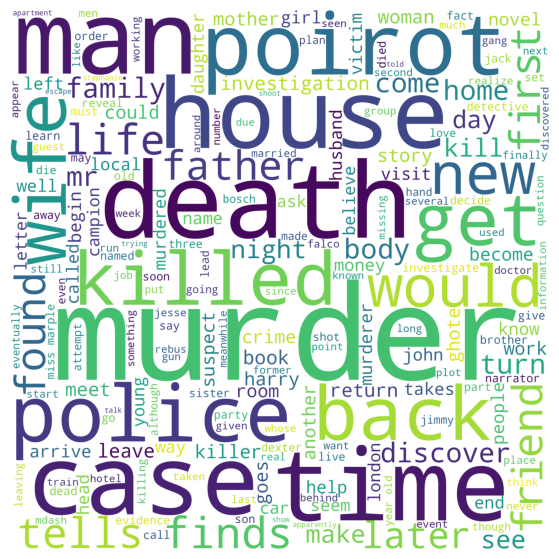

Fantasy WordCloud


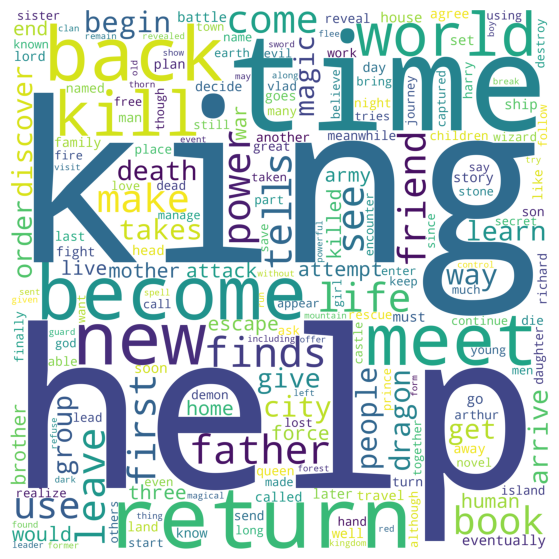

History WordCloud


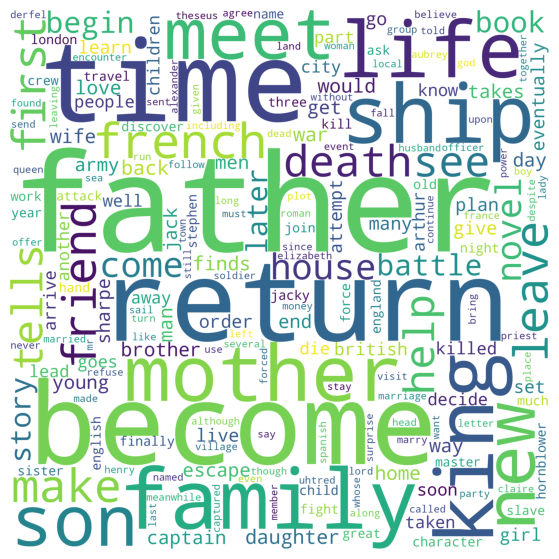

Horror WordCloud


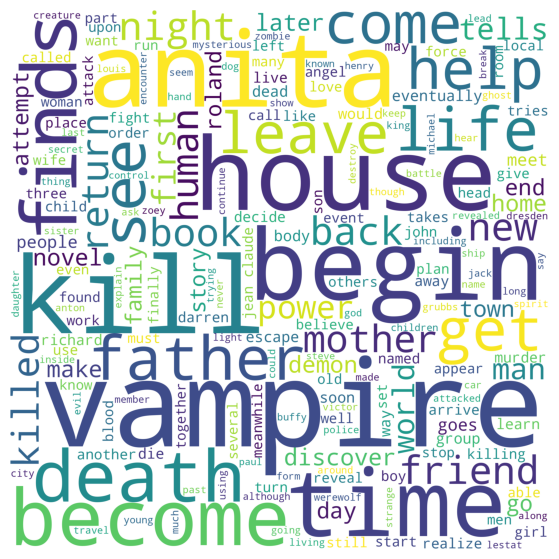

Science WordCloud


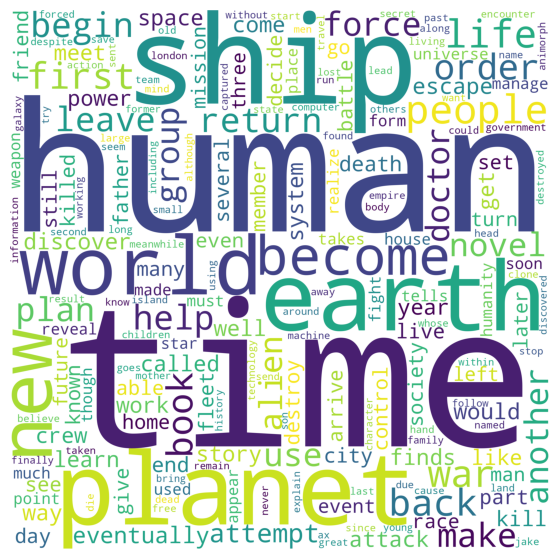

Thriller WordCloud


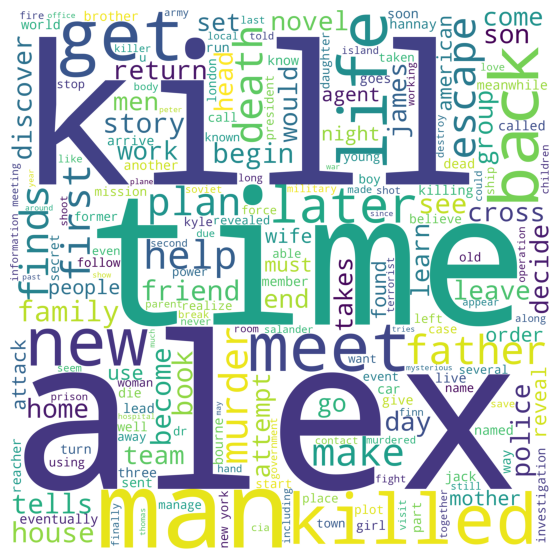

In [ ]:
#stop = set(stopwords.words('english'))
import matplotlib.pyplot as plt


crime = df[df['genreEncoded'] == 0]
crime = crime['summary']
fantasy = df[df['genreEncoded'] == 1]
fantasy = fantasy['summary']
history = df[df['genreEncoded'] == 2]
history = history['summary']
horror = df[df['genreEncoded'] == 3]
horror = horror['summary']
science = df[df['genreEncoded'] == 4]
science = science['summary']
thriller = df[df['genreEncoded'] == 5]
thriller = thriller['summary']

def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    #if (word != 'one' and word != 'find')]) # в этой строчке можно убрать бессмысленные слова
    # которые часто встречаются, как one и find, потому что их много во всех жанрах

    wordcloud = WordCloud(stopwords = stopwords,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()
print("Crime WordCloud")
wordcloud_draw(crime, 'white')
print("Fantasy WordCloud")
wordcloud_draw(fantasy, 'white')
print("History WordCloud")
wordcloud_draw(history, 'white')
print("Horror WordCloud")
wordcloud_draw(horror, 'white')
print("Science WordCloud")
wordcloud_draw(science, 'white')
print("Thriller WordCloud")
wordcloud_draw(thriller, 'white')

In [ ]:
X = df['summary']
y = df['genre']
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=22)
print(len(X_train))

3001
2400


The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object.

Посмотрим результаты нескольких классификаторов:

**Логистическая регрессия**
* LogisticRegression

**Наивный Байес** – это алгоритм классификации в машинном обучении, основанный на теореме Байеса, фундаментальном принципе вероятности.
Алгоритм использует вероятности для прогнозирования вероятности принадлежности конкретной точки данных определенному классу. В контексте наивного байесовского алгоритма *наивный* относится к предположению, что признаки, используемые для классификации, условно *независимы* с учетом метки класса. Проще говоря, предполагается, что наличие или отсутствие определенного признака в классе **не связано** с наличием или отсутствием какого-либо другого признака в этом классе.

* MultinomialNB
* ComplementNB (was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.)

**K-Nearest Neighbors** - исключён по причине слишком долгого выполнения.
* KNeighborsClassifier

**Decision tree**
* DecisionTreeClassifier

**Support Vector Machines** (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection:

* LinearSVC (Linear Support Vector Classification)



In [ ]:
# pipelines
pipeLR = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

pipeMNB = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
pipeCNB = Pipeline([('tfidf', TfidfVectorizer()), ('clf', ComplementNB())])

pipeDTC = Pipeline([('tfidf', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])

pipeSVC = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

TfidfVectorizer - преобразует текст в векторы объектов, которые можно использовать в качестве входных данных для оценки.

Term Frequency-Inverse Document Frequency (TF-IDF) — это один из наиболее распространенных и мощных методов для извлечения признаков из текстовых данных. TF-IDF вычисляет важность каждого слова в документе относительно количества его употреблений в данном документе и во всей коллекции текстов. Этот метод позволяет выделить ключевые слова и понять, какие слова имеют больший вес для определенного документа в контексте всей коллекции.

Основы TF-IDF
Понятие и формула TF-IDF
Термины "TF" (Term Frequency) и "IDF" (Inverse Document Frequency)
TF (Частота термина) обозначает, насколько часто определенное слово появляется в данном документе. Таким образом, TF измеряет важность слова в контексте отдельного документа.

IDF (Обратная частота документа) измеряет, насколько уникально слово является по всей коллекции документов. Слова, которые появляются в большинстве документов, имеют низкое IDF, так как они не вносят большой информационной ценности.

Формула вычисления TF-IDF
Формула TF-IDF комбинирует понятия TF и IDF, чтобы вычислить важность каждого слова в каждом документе. Формально, формула выглядит следующим образом:

TF-IDF(t, d) = TF(t, d) * IDF(t)

где:

TF(t, d) - Частота термина (TF) для слова "t" в документе "d".

IDF(t) - Обратная частота документа (IDF) для слова "t".

In [ ]:
pipeLR.fit(X_train, y_train)
predictLR = pipeLR.predict(X_test)
print(f"LR: {accuracy_score(y_test, predictLR):.2f}")

# fit is a learning stage
pipeMNB.fit(X_train, y_train)
# now we look how it predicts lables (that's why y_test is absent)
predictMNB = pipeMNB.predict(X_test) # array of predicted lables

# compare real and predicted lables
print(f"MNB: {accuracy_score(y_test, predictMNB):.2f}") #.2f - два знака после точки
# the closer to 1 the better

pipeCNB.fit(X_train, y_train)
predictCNB = pipeCNB.predict(X_test)
print(f"CNB: {accuracy_score(y_test, predictCNB):.2f}")

pipeDTC.fit(X_train, y_train)
predictDTC = pipeDTC.predict(X_test)
print(f"DTC: {accuracy_score(y_test, predictDTC):.2f}")

pipeSVC.fit(X_train, y_train)
predictSVC = pipeSVC.predict(X_test)
print(f"SVC: {accuracy_score(y_test, predictSVC):.2f}")

LR: 0.74
MNB: 0.75
CNB: 0.74
DTC: 0.48
SVC: 0.74


С предварительной обработкой текста:
- LR: 0.74
- MNB: 0.75
- CNB: 0.74
- DTC: 0.48
- SVC: 0.74

## Матрица ошибок для каждой модели.

LR


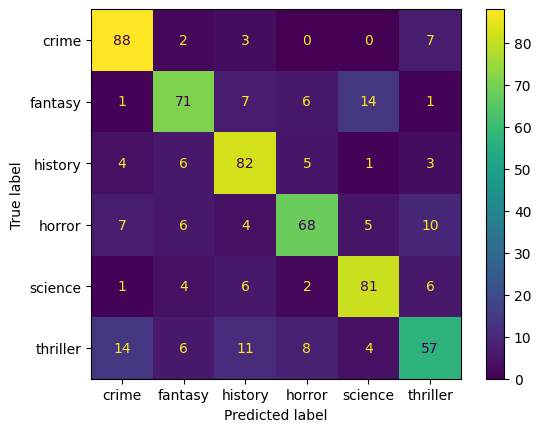

MNB


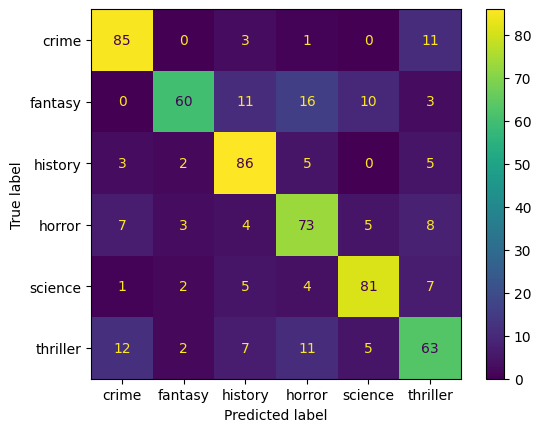

CNB


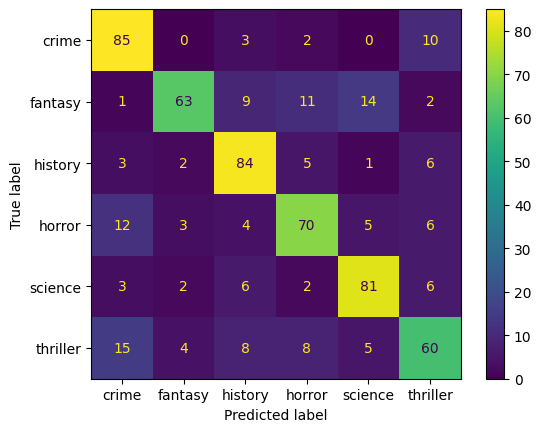

DTC


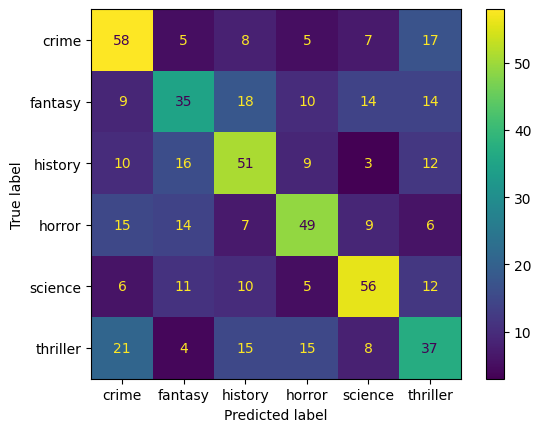

SVC


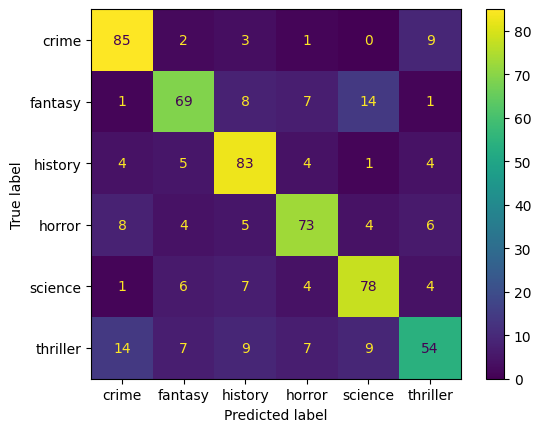

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def draw_conf_matrix(predict_, pipe_):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=predict_)
  vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipe_.classes_)
  vis.plot()
  plt.show()

print("LR")
draw_conf_matrix(predictLR, pipeLR)
print("MNB")
draw_conf_matrix(predictMNB, pipeMNB)
print("CNB")
draw_conf_matrix(predictCNB, pipeCNB)
print("DTC")
draw_conf_matrix(predictDTC, pipeDTC)
print("SVC")
draw_conf_matrix(predictSVC, pipeSVC)

Изучим подробнее модель, показавшую наилучший результат: MultinomialNB.

In [ ]:
print('y_test')
print(y_test[50:60])
print('predictMNB')
print(predictMNB[50:60])

y_test
1567     history
1740     history
1988     history
1479       crime
2727    thriller
1851     history
1570     history
861      science
1168       crime
449      fantasy
Name: genre, dtype: object
predictMNB
['history' 'history' 'history' 'crime' 'thriller' 'history' 'history'
 'science' 'crime' 'fantasy']


In [ ]:
print(classification_report(y_test, predictMNB))

              precision    recall  f1-score   support

       crime       0.79      0.85      0.82       100
     fantasy       0.87      0.60      0.71       100
     history       0.74      0.85      0.79       101
      horror       0.66      0.73      0.70       100
     science       0.80      0.81      0.81       100
    thriller       0.65      0.63      0.64       100

    accuracy                           0.75       601
   macro avg       0.75      0.75      0.74       601
weighted avg       0.75      0.75      0.74       601



Accuracy - отношение успешно предсказанных наблюдений ко всем наблюдениям.

Precision - отношение точно предсказанных положительных наблюдений к общему количеству ожидаемых положительных наблюдений.

Recall - доля точно предсказанных положительных наблюдений от всех наблюдений в классе.

F1 Score - the weighted average of Precision and Recall.

F1 Score = 2(Recall * Precision) / (Recall + Precision)*


In [ ]:
# Проверим, сможет ли модель правильно предсказать жанры этих книг
crime = "Detective Matthew Venn returns in The Raging Storm, the next captivating novel in the Two Rivers series from Ann Cleeves. When enigmatic sailor Jem Rosco arrives in Greystone, Devon, the town are delighted to have a celebrity in their midst. But when he disappears and is later found dead during a storm, DI Matthew Venn faces an uncomfortable case. Having left the Barum Brethren community in Greystone, Venn's judgment is clouded by superstitions and rumors as another body is discovered in Scully Cove. Isolated by the storm, Venn and his team embark on a perilous investigation, unaware that their own lives may be at risk."
fantasy = "The King of Elfland’s Daughter is a fairy tale with deep, dark roots — as well as a love story rendered with piercing emotional honesty. It’s also an unlikely immigration novel, about an elfin princess’s attempts to deal with her fractured sense of self as she adjusts to the homeland of her beloved human husband. Another remarkably early entry into the fantasy genre, this book prompted Arthur C. Clarke to name Dunsany as one of the greatest writers of his century, and World Fantasy Award winner Jane Yolen to call him “the great grandfather of us all."
history = "Published to coincide with the centenary of Tolstoy's death, here is an exciting new edition of one of the great literary works of world literature. Tolstoy's epic masterpiece captures with unprecedented immediacy the broad sweep of life during the Napoleonic wars and the brutal invasion of Russia. Balls, the burning of Moscow, the intrigues of statesmen and generals, scenes of violent battles, the quiet moments of everyday life--all in a work whose extraordinary imaginative power has never been surpassed. The Maudes' translation of Tolstoy's epic masterpiece has long been considered the best English version, and now for the first time it has been revised to bring it fully into line with modern approaches to the text. French passages are restored, Anglicization of Russian names removed, and outmoded expressions updated. A new introduction by Amy Mandelker considers the novel's literary and historical context, the nature of the work, and Tolstoy's artistic and philosophical aims. New, expanded notes provide historical background and identifications, as well as insight into Russian life and society."
horror = "Just as the tin says! Gothic Tales is a collection of (surprise!) gothic tales — more specifically, fairy tales intertwined with short stories. Written by 19th-century author Elizabeth Gaskell, these stories deliver everything: disappearances, Salem witch hunts, mysterious children wandering lost in the moors, and local legends that may or may not return to haunt the townspeople. And with every story, Gaskell shows her uncanny talent of blending reality and the supernatural with spine-tingling dexterity."
science = "The Time Machine is often credited as the work that sparked the concept of time travel via a — drum roll please — time machine! In this seminal novel that launched H.G. Wells’ career, a time travelling explorer visits a future 800,000 years away. Instead of an encountering an advanced and superior society, he finds that Earth is dying and the races that still inhabit it are at war. In order to return home, he’ll have to explore the tunnels where the sinister Morlocks live — and discover the darker side of human nature."
thriller = "Ten days. Eight suspects. Six cities. Five authors. Three bodies. One trip to die for. Protagonist Eleanor Dash, famous for penning the Vacation Mysteries series, suddenly becomes the chief investigator in a real-life murder mystery during her book tour in the serene Amalfi Coast. With her ex-boyfriend's death, a string of literary rivals come under suspicion, creating an atmosphere thick with uncertainty and dread. Part The White Lotus, part Only Murders in the Building, Catherine Mack's first book in this new series provides a suspenseful adventure that you won’t be able to put down."

print("crime:", pipeMNB.predict([crime]))
print("fantasy:", pipeMNB.predict([fantasy]))
print("history:", pipeMNB.predict([history]))
print("horror:", pipeMNB.predict([horror]))
print("science:", pipeMNB.predict([science]))
print("thriller:", pipeMNB.predict([thriller]))


crime: ['crime']
fantasy: ['fantasy']
history: ['history']
horror: ['horror']
science: ['science']
thriller: ['crime']


Жанры crime и thriller очень похожи, поэтому ошибок не избежать.